### Sistema de Equações Diferenciais de 1ª Ordem

Seja $I \subset  \mathbb{R}$, $A \subset \mathbb{R}^n$ e, para $i = 1, ..., n$, $f_i : I \times A → \mathbb{R}$, denomina-se por equação diferencial
vectorial de primeira ordem um sistema de equações do tipo

\begin{cases}
\dot{y}_1 = f_1(t,y_1(t),y_2(t),...,y_n(t)) \\
\dot{y}_2 = f_2(t,y_1(t),y_2(t),...,y_n(t)) \\
\vdots \quad \quad \quad \quad \vdots  \\
\dot{y}_n = f_n(t,y_1(t),y_2(t),...,y_n(t))
\end{cases}

onde as soluções são funções $y_1(t), ..., y_n(t): I \subset \mathbb{R}$ de classe $C^1$ em $I$. Utilizando notação vectorial, este sistema pode então ser escrito de forma abreviada como a equação vectorial

$$Y'(t) = F(t,Y(t))$$ sendo

$Y'(t) = \begin{bmatrix} y_1(t)\\ \vdots \\ y_n(t)
\end{bmatrix}$ e 
$F(t,Y(t)) = \begin{bmatrix} f_1(t,y_1(t),y_2(t),...,y_n(t))\\ \vdots \\ f_n(t,y_1(t),y_2(t),...,y_n(t))
\end{bmatrix}$

sendo $t_0 \in I$, denomina-se problema de valor inicial a

\begin{cases}
Y'(t) = F(t,Y(t)), \quad \text{$t \in I$} \\
\\
Y(t_0) = Y_0
\end{cases}

onde se supõe que $t_0 ∈ I$ e $Y_0 = y_1(t_0), . . . , y_n(t_0) \in A$.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Exemplo

Seja o seguinte sistema de estado

$\begin{cases}
\dfrac{dx}{dt} = t^2 \cdot y(t) \\ \\
\dfrac{dy}{dt} = -t \cdot x(t) \end{cases} $

com Condição Inicial

No instante $t=0$:

$x(0) = 1, \quad y(0) = 1$

Note que  

$\begin{cases}
\dfrac{dx}{dt} = 0 \cdot x(t) + t^2 \cdot y(t) \\ \\
\dfrac{dy}{dt} = -t \cdot x(t) + 0 \cdot y(t) \end{cases}$

Asim

$\begin{bmatrix} x'(t)\\ y'(t) \end{bmatrix} = \begin{bmatrix} 0 & t^2\\ -t & 0 \end{bmatrix} \begin{bmatrix} x(t)\\ y(t) \end{bmatrix}$

Seja

$\dfrac{dS}{dt} = \begin{bmatrix} x'(t)\\ y'(t) \end{bmatrix}$

e 

$S = \begin{bmatrix} x(t)\\ y(t) \end{bmatrix}$

Otemos a seguinte Equação diferencial matricial

$\dfrac{dS}{dt} = \begin{bmatrix} 0 & t^2\\ -t & 0 \end{bmatrix} \begin{bmatrix} x(t)\\ y(t) \end{bmatrix} $







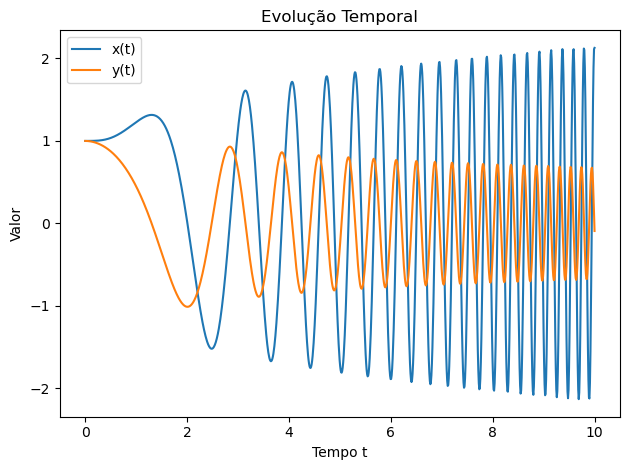

In [53]:
def Sistema(t,S):
    M = np.array([[0,t**2],[-t,0]])
    return np.dot(M,S)

t = np.linspace(0,10,1000)
sol = solve_ivp(Sistema,[0,10], [1,1], t_eval=t) #Y(0) = (x(0),y(0)) = (1,1)
plt.plot(sol.t,sol.y[0], label="x(t)")
plt.plot(sol.t,sol.y[1], label="y(t)")
plt.xlabel("Tempo t")
plt.ylabel("Valor")
plt.title("Evolução Temporal")
plt.legend()
plt.tight_layout()

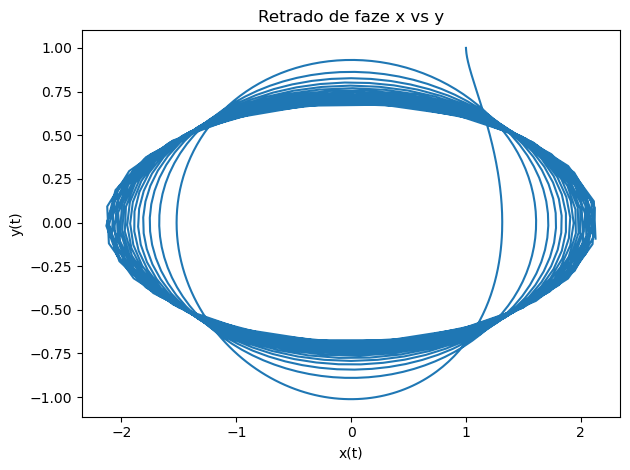

In [55]:
def Sistema(t,S):
    M = np.array([[0,t**2],[-t,0]])
    return np.dot(M,S)

t = np.linspace(0,10,1000)
sol = solve_ivp(Sistema,[0,10], [1,1], t_eval=t) 
plt.plot(sol.y.T[:,0],sol.y.T[:,1])
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.title("Retrado de faze x vs y")
plt.tight_layout()

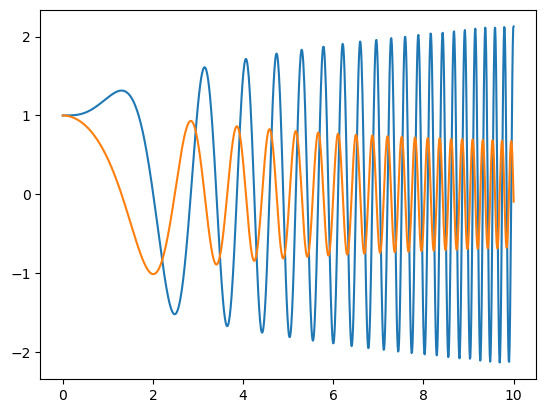

In [51]:
F = lambda t,S: np.dot(np.array([[0,t**2],[-t,0]]),S)
t = np.linspace(0,10,1000)
sol = solve_ivp(F,[0,10], [1,1], t_eval=t) #Y(0) = (x(0),y(0)) = (1,1)
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])

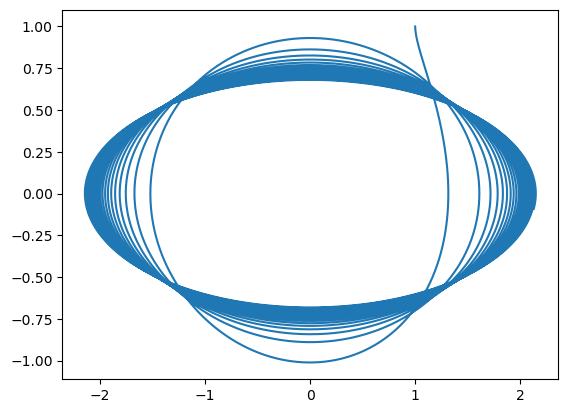

In [49]:
F = lambda t,S: np.dot(np.array([[0,t**2],[-t,0]]),S)
t = np.linspace(0,10,10000)
sol = solve_ivp(F,[0,10], [1,1], t_eval=t) #Y(0) = (X(0),y(0)) = (1,1)
plt.plot(sol.y.T[:,0],sol.y.T[:,1])

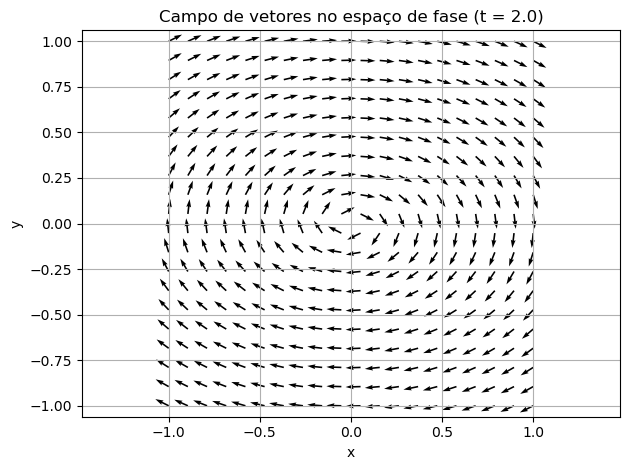

In [45]:
def dx(t,y):
    return t**2*y

def dy(t,x):
    return -t*x

t,x,y = 2.0, np.linspace(-1,1,20), np.linspace(-1,1,20)
X,Y = np.meshgrid(x,y)
DT = 1
DX = dx(t,Y)
DY = dy(t,X)

M = np.sqrt(DX**2 + DY**2)

DX /= M
DY /= M

plt.quiver(X,Y,DX,DY)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Campo de vetores no espaço de fase (t = {t})")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()